In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [3]:
import ar2gas as gas
import pygeostat as gs
import numpy as np
import matplotlib.pyplot as plt
import helpers
from scipy.stats import norm
import proportions
from cat_variogram_on_grid import *

In [4]:
nx, xmn, xsiz, ny, ymn, ysiz, nz, zmn, zsiz = 1133, 0, 1, 1133, 0, 1, 1, 0, 1
griddef = gs.GridDef([nx, xmn, xsiz, ny, ymn, ysiz, nz, zmn, zsiz])
exhaust = gs.DataFile(flname='exhaust.dat', griddef=griddef)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

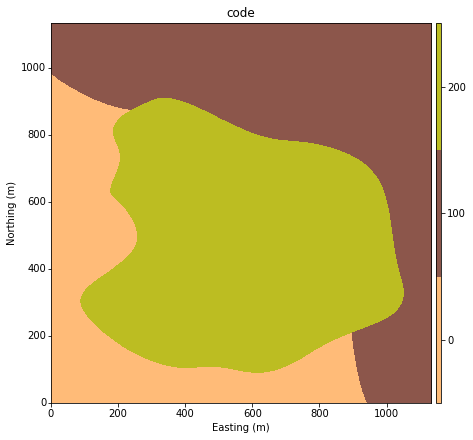

In [5]:
gs.pixelplt(exhaust, var='code', figsize=(7,7), catdata=True)

In [6]:
data = gs.DataFile(flname='dataset.csv', x='x', y='y')

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

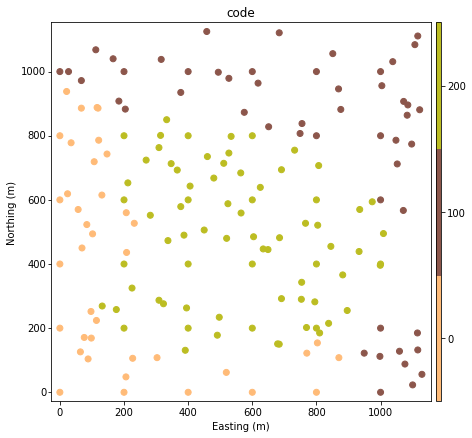

In [7]:
gs.locmap(data, x='x', y='y', figsize=(7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

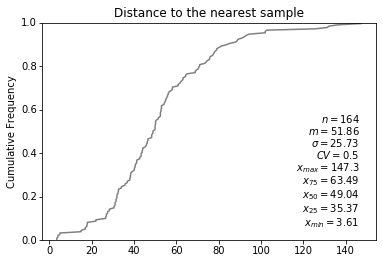

In [8]:
helpers.samples_dist(data.data.x, data.data.y, None)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

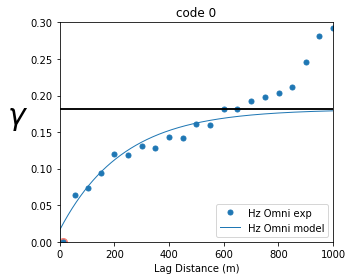

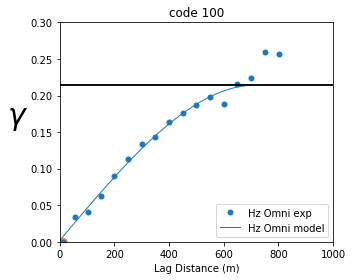

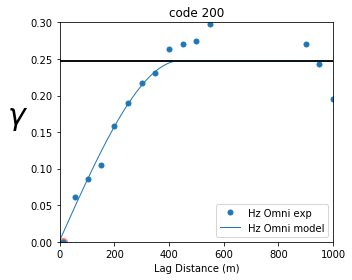

In [9]:
codes = [0, 100, 200]
#fig, axes = plt.subplots(1, 3, figsize=(15,5))
variograms = {}
for idx, c in enumerate(codes):
    data['ind_{}'.format(c)] = np.where((data['code'] == c) == True, 1, 0)
    vario = gs.Variogram(data, 'ind_{}'.format(c), ndim=2, ndir=1, omnihz=True, mute=True, warn=False)
    vario.settols(nlags=20, lagdist=50, lagtol=25)
    vario.varcalc()
    vario.fitmodel(sill=np.var(data['ind_{}'.format(c)]))
    #ax = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], axes=axes[idx], ms=5)
    fig = vario.plot(titles='code {}'.format(int(c)), model=True, sill=np.var(data['ind_{}'.format(c)]), ylim=[0.0,0.3], ms=5, figsize=(5,4))
    variograms['code {}'.format(int(c))] = helpers.gslibvar_to_ar2gasvar(vario.model)
    plt.tight_layout()

In [10]:
#a2ggrid, gsgrid = helpers.autogrid(data.data.x, data.data.y, None, 1, 1, 1)
gsgrid = gs.GridDef([nx, xmn, xsiz, ny, ymn, ysiz, nz, zmn, zsiz])
a2ggrid = gas.data.CartesianGrid(nx, ny, nz, xsiz, ysiz, zsiz, xmn, ymn, zmn)

In [11]:
ind_krig = {}
#fig, axes = gs.subplots(1, 3, figsize=(20,5), cbar_mode='single')
ps = gas.data.PointSet(data.data.x.values, data.data.y.values, np.zeros(len(data.data.y.values)))
for idx, c in enumerate(codes):
    krig_cov = gas.compute.KrigingCovariance(1.,variograms['code {}'.format(int(c))])
    kriger = gas.compute.DualKriging.OK(krig_cov, ps, data.data['ind_{}'.format(c)], 0)
    results = np.ones(a2ggrid.size())*float('nan')
    kriger.compute(a2ggrid, results, 0)
    ind_krig['code {}'.format(int(c))] = results
    #gs.pixelplt(results, gsgrid, ax = axes[idx], title='code {}'.format(int(c)))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

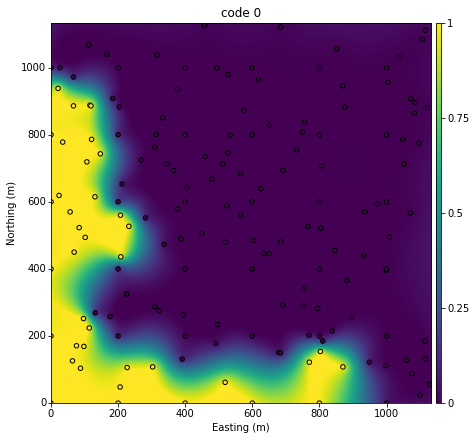

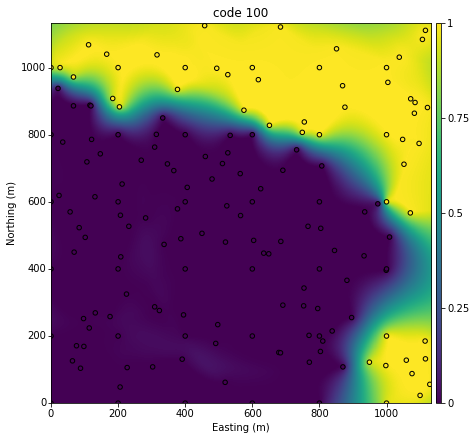

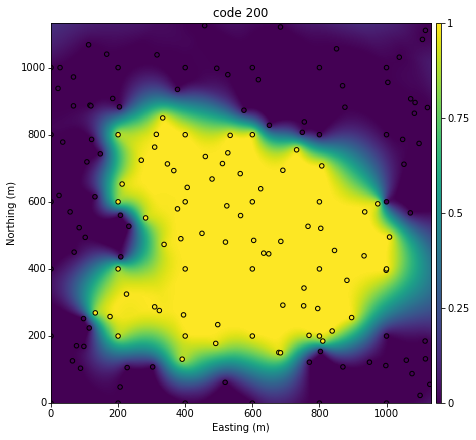

In [12]:
std_results = helpers.standardize([ind_krig['code 0'], ind_krig['code 100'], ind_krig['code 200']])
for idx, c in enumerate(codes):
    gs.pixelplt(std_results[idx], gsgrid, title='code {}'.format(int(c)), figsize = (7,7), pointdata=data, pointvar='ind_{}'.format(c), pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [13]:
u = helpers.u_coef(std_results)

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

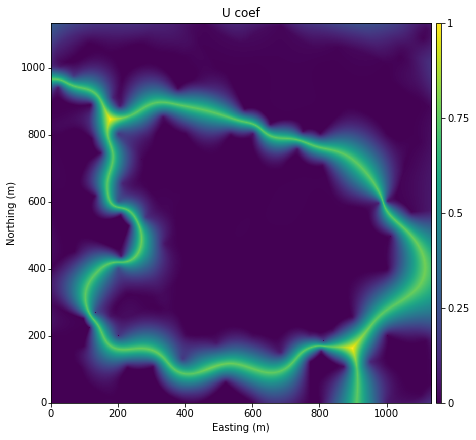

In [14]:
gs.pixelplt(u, gsgrid, title='U coef', figsize = (7,7), pointdata=data, pointvar='w')

In [15]:
mask_bool = u > 0.25
mask = np.where(mask_bool, 1, 0)

In [16]:
ptvar = np.ones(len(data))
data['ptvar']=ptvar

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

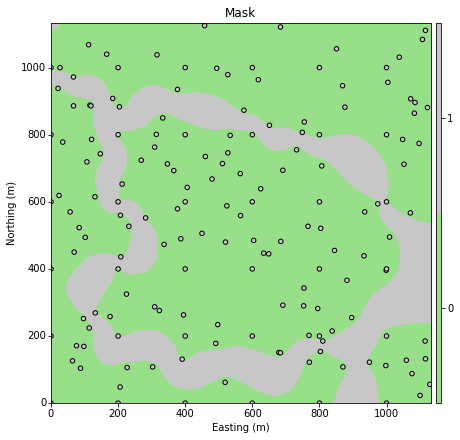

In [17]:
gs.pixelplt(mask, gsgrid, title='Mask', figsize = (7,7), pointdata=data, pointvar='ptvar',  pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\site-packages\scipy\stats\_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcpar

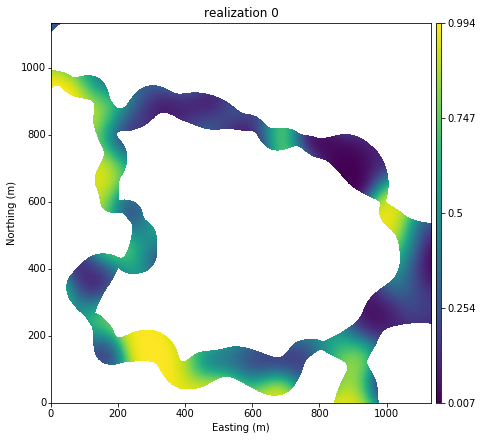

In [18]:
masked_grid = gas.data.MaskedGrid(a2ggrid, mask_bool)
var_range = 200
seed = int(''.join(map(str,np.random.randint(0,9,6))))
cov = [gas.compute.Covariance.nugget(0.0001), gas.compute.Covariance.gaussian(0.9999, var_range, var_range, var_range, 0., 0., 0.)]
simulator = gas.compute.Tbsim.multi_realization(seed, 10, masked_grid, 1000, cov)
results = simulator.simulate(masked_grid, 10, 0)
results = helpers.masked_sim(mask_bool, results)
results = [norm.cdf(lst) for lst in results]
gs.pixelplt(results[0], gsgrid, title='realization {}'.format(0), figsize = (7,7))

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

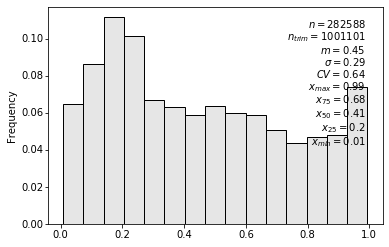

In [19]:
gs.histplt(results[0])

C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\Roberto Rolo\Anaconda3\envs\geostat

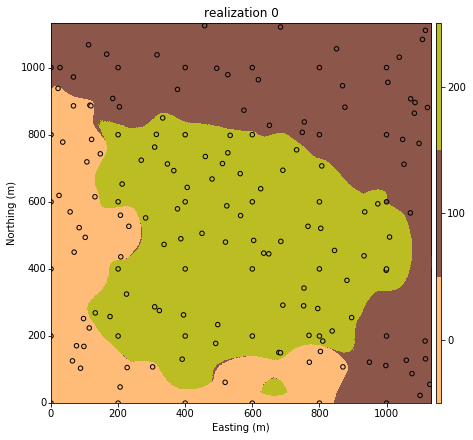

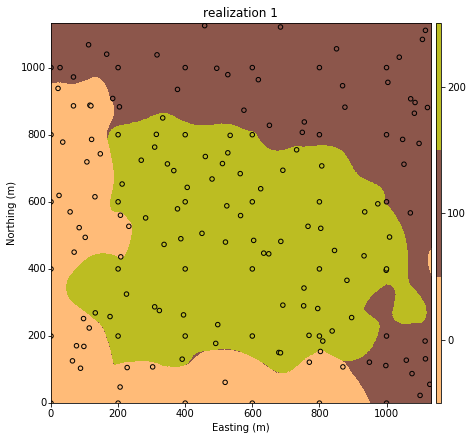

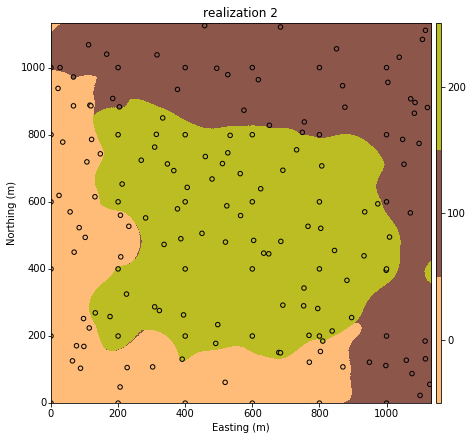

In [20]:
cat_reals = helpers.cat_sampler(std_results, [0,100,200], results)
for i in range(0,3):
    gs.pixelplt(np.array(cat_reals[i]), gsgrid, title='realization {}'.format(i), figsize = (7,7), pointdata=data, pointvar='code', pointkws={'marker':'o', 's':20, 'edgecolors': 'k'})

In [21]:
anis = gas.data.AnisotropicTransformation(10000, 10000, 10000, 0, 0, 0)
nei = gas.data.KDTree(ps, 1, anis)
sf = gas.data.SearchFilter.no_filter()
est = gas.compute.NNEstimator.KNN(nei, sf, a2ggrid, data.data.code)
target = est.compute(a2ggrid, 0)

In [22]:
#proportions.cat_plot(target, cat_reals, weights=None)

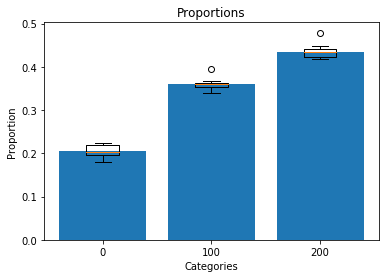

In [23]:
proportions.cat_plot(exhaust.data.code.values, cat_reals, weights=None)

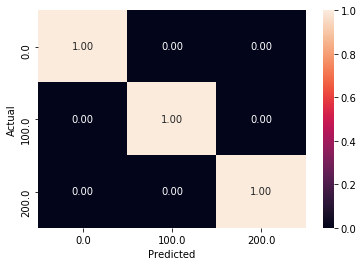

In [24]:
proportions.back_flag(a2ggrid, cat_reals, data.data.x, data.data.y, None, data.data.code)

Getting pairs for lag 100
Getting pairs for lag 200
Getting pairs for lag 300
Getting pairs for lag 400
Getting pairs for lag 500
took 114.16 seconds 

Getting variances for code 0
Getting variances for exhaustive
Getting variances for realization 0
Getting variances for realization 1
Getting variances for realization 2
Getting variances for realization 3
Getting variances for realization 4
Getting variances for realization 5
Getting variances for realization 6
Getting variances for realization 7
Getting variances for realization 8
Getting variances for realization 9
Getting variances for code 100
Getting variances for exhaustive
Getting variances for realization 0
Getting variances for realization 1
Getting variances for realization 2
Getting variances for realization 3
Getting variances for realization 4
Getting variances for realization 5
Getting variances for realization 6
Getting variances for realization 7
Getting variances for realization 8
Getting variances for realization 9
Ge

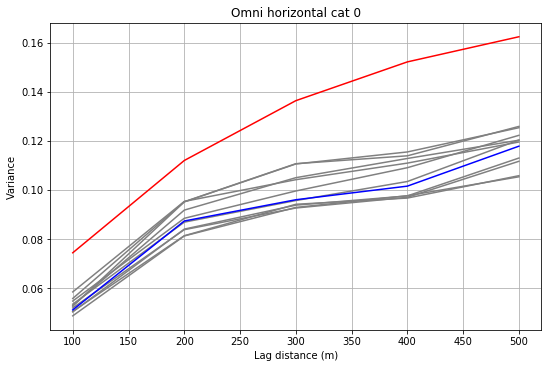

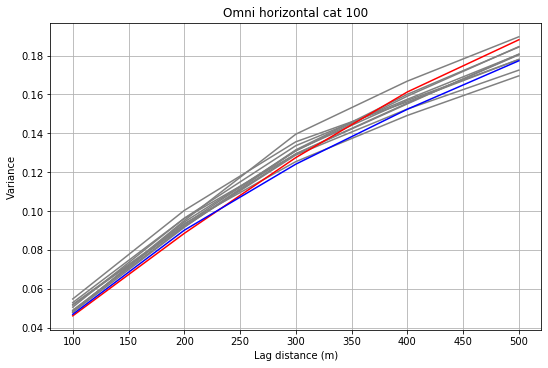

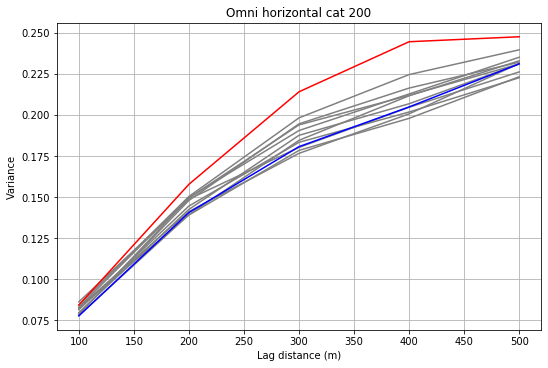

In [25]:
vargrid = Variogram(a2ggrid.dim()[0], a2ggrid.dim()[1], a2ggrid.dim()[2], cat_reals, [0, 100, 200], 5, 100, exhaust['code'].values)
vargrid.calculate()
vargrid.plot(1, 1, [variograms['code 0'], variograms['code 100'], variograms['code 200']])